### SVM on MNIST data

### Name: Deepak Reddy

### Q1
### Multiclass classification is different when we use linear kernel for SVC and linear SVC. 

 In SVC, multiclass classification is done by one Vs one method, where the two datasets of the two classes is taken seperately and classifer is constructed. If there are n classes, n*(n-1)/2 such classifiers are constructed with train data frm the two considered classes. Finally, to compare the output with other classifiers such as linear SVC, we need to aggregate all one Vs one classifiers.
 
In case of linear SVC, multiclass classification is done using one Vs rest method, where each class is treated seperately from rest of the classes. Data is split in to two sets based on the data from that class and data not from that class. Finally, we have n such classifiers trained for n classes.

### (i) Loading MNIST data and training classifiers for range of C values for linear SVM

In [1]:
from mnist import MNIST
import numpy as np
import random
import time
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
mndata = MNIST('MNIST')

In [3]:
images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()
images_train  = np.asarray(images_train)/255
images_test  = np.asarray(images_test)/255
labels_train = np.asarray(labels_train)
labels_test = np.asarray(labels_test)

In [147]:
from sklearn.svm import LinearSVC
models = []
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
start = time.clock()
for i in range(len(C)):
    #indices = np.random.choice(labels_train.shape[0], 30000, replace = False)
    lin_clf = LinearSVC(C = C[i], dual = False)
    lin_clf.fit(images_train, labels_train)

    models.append(lin_clf)
end = time.clock()
print("Time to train for all C's :", end-start)

# save the model to disk
import pickle
filename = 'finalized_model.txt'
pickle.dump(models, open(filename, 'wb'))

Time to train for all C's : 604.3811321783505


In [91]:
# load the model from disk
import pickle
loaded_models = pickle.load(open('finalized_model.txt', 'rb'))
result = len(loaded_models)
print(result)

8


In [20]:
def pred_accuracy(i):
    lin_clf = loaded_models[i]
    pred_train = lin_clf.predict(images_train)
    accuracy_train = np.sum(1*(labels_train == pred_train))/labels_train.shape[0]
    
    pred_test = lin_clf.predict(images_test)
    accuracy_test = np.sum(1*(labels_test == pred_test))/labels_test.shape[0]
    print("Train_accuracy = %0.4f, Test_accuracy: %0.4f for C = %0.3f," %(accuracy_train, accuracy_test, C[i]))
    return (accuracy_train, accuracy_test)

In [101]:
from sklearn.svm import LinearSVC
lin_clf1 = LinearSVC(C = C[3], dual = False)
lin_clf1.fit(images_train, labels_train)
pred_test = lin_clf1.predict(images_test)

In [102]:
#Output confusion matrix 
y_actu = pd.Series(labels_test, name='Actual')
y_pred = pd.Series(pred_test, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print("Confusion matrix")
print(df_confusion)

print(" ")
print("Accuracy matrix from confusion matrix:")
p = confusion_matrix(y_actu, y_pred)
a = np.zeros((p.shape))
for i in range(10):
    a[i] = np.float16(p[i])/p[i].sum()
a = np.around(a, decimals=3)
print(a*100)

Confusion matrix
Predicted    0     1    2    3    4    5    6    7    8    9
Actual                                                      
0          962     0    2    1    1    4    5    3    1    1
1            0  1112    3    2    0    1    5    1   11    0
2           11    11  914   18   10    4   13   12   36    3
3            4     0   19  918    2   22    5   12   20    8
4            1     4    5    4  913    0    9    3    5   38
5            9     2    0   39   12  768   18    7   29    8
6            7     4    7    2    5   21  909    1    2    0
7            2     8   23    5    7    1    1  948    4   29
8           11    13    8   21   14   31    8   13  843   12
9            7     8    2   15   31   12    0   26   12  896
 
Accuracy matrix from confusion matrix:
[[ 98.2   0.    0.2   0.1   0.1   0.4   0.5   0.3   0.1   0.1]
 [  0.   98.    0.3   0.2   0.    0.1   0.4   0.1   1.    0. ]
 [  1.1   1.1  88.6   1.7   1.    0.4   1.3   1.2   3.5   0.3]
 [  0.4   0.    1.9  

### Plotting Train accuracy and Test accuracy for different values of C

Train_accuracy = 0.9087, Test_accuracy: 0.9128 for C = 0.001,
Train_accuracy = 0.9196, Test_accuracy: 0.9170 for C = 0.010,
Train_accuracy = 0.9248, Test_accuracy: 0.9181 for C = 0.100,
Train_accuracy = 0.9263, Test_accuracy: 0.9183 for C = 1.000,
Train_accuracy = 0.9270, Test_accuracy: 0.9169 for C = 10.000,
Train_accuracy = 0.9275, Test_accuracy: 0.9166 for C = 100.000,
Train_accuracy = 0.9275, Test_accuracy: 0.9166 for C = 1000.000,
Train_accuracy = 0.9275, Test_accuracy: 0.9167 for C = 10000.000,


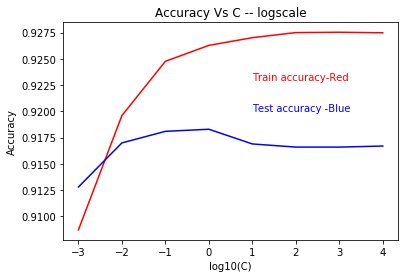

In [95]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
pred_train = np.zeros(len(C))
pred_test = np.zeros(len(C))
for i in range(len(C)):
    pred_tr, pred_tst = pred_accuracy(i)
    pred_train[i] = pred_tr
    pred_test[i] = pred_tst

plt.plot(np.log10(C), pred_train, 'r',np.log10(C), pred_test, 'b', )
#plt.ylim((0.91,0.93))
plt.ylabel('Accuracy')
plt.text(1, 0.923, r'Train accuracy-Red', color='red') 
plt.text(1, 0.92, r'Test accuracy -Blue', color='blue')
plt.xlabel('log10(C)')
plt.title('Accuracy Vs C -- logscale')
plt.show()

### Comments
From the above plot, it can be seen that as we increase C value, the training accuracy increases as the model is overfitting with increase in variance value.

In terms of bias, for low values of C, till we reach C = 0, the testing accuracy increases and  decreases later for values of C higher than 1. This shows that the model has bias problem till for values of C < 1.

Therefore from the above plot we select C = 1 as the best value as it gives the best trade off between bias and variance. 

#### The highest accuracy is 91.83 at C = 1 for linear SVM 

### (ii) Images for 10 coef_ outputs of classifier for C = 1

In [25]:
# load the model from disk
import pickle
loaded_models = pickle.load(open('finalized_model.txt', 'rb'))

#Getting the Linear SVC model from the saved models for C = 1
lin_clf1 = loaded_models[3]
print(lin_clf1)
print("Coefficient matrix shape: ", lin_clf1.coef_.shape)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Coefficient matrix shape:  (10, 784)


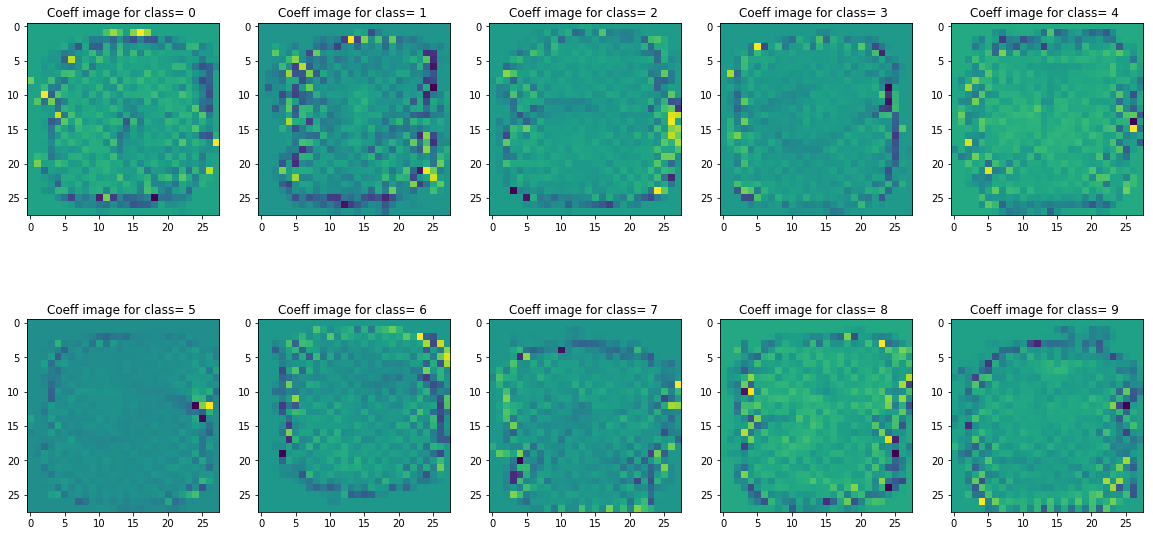

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (20,10))
for i in range(lin_clf1.coef_.shape[0]):
   
    plt.subplot(2, 5, i+1)
    W = lin_clf1.coef_[i]
    plt.title('Coeff image for class= %d ' %i)
    plt.imshow(np.reshape(W, (28,28)))
plt.show()

### Comments
The images vaguely resemble the class label. They are not that similar to ones in logistic regression

When compared with logistic regression images, the images are pixelated at the boundaries of label shape and the boundary is much more distinct for labels. For logistic regression images, the image labels were distributed and smooth.

We observe this change in images as the method of evaluating the coefficient vectors is different for SVM and logitic regression. In case of logistic regression, we optimize the loss function with probabilities and in case of SVM, we optimize the function with the distances from the hyperplane.

### (iii) Changing the penalty parameter to l1

In [152]:
from sklearn.svm import LinearSVC
models = []
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
start = time.clock()
for i in range(len(C)):
    
    lin_clf = LinearSVC(C = C[i], dual = False, penalty='l1')
    lin_clf.fit(images_train, labels_train)

    models.append(lin_clf)
end = time.clock()
print("Time to train for all C's :", end-start)
# save the model to disk
import pickle
filename = 'finalized_model_l1.txt'
pickle.dump(models, open(filename, 'wb'))

Time to train for all C's : 1647.9877320349801


In [36]:
# load the model from disk
loaded_models_l1 = pickle.load(open('finalized_model_l1.txt', 'rb'))
result = len(loaded_models_l1)
print(result)

8


In [107]:
from sklearn.svm import LinearSVC
lin_clf1_l1 = LinearSVC(C = C[2], dual = False)
lin_clf1_l1.fit(images_train, labels_train)
pred_test = lin_clf1_l1.predict(images_test)

In [108]:
#Output confusion matrix 
y_actu = pd.Series(labels_test, name='Actual')
y_pred = pd.Series(pred_test, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print("Confusion matrix")
print(df_confusion)

print(" ")
print("Accuracy matrix from confusion matrix:")
p = confusion_matrix(y_actu, y_pred)
a = np.zeros((p.shape))
for i in range(10):
    a[i] = np.float16(p[i])/p[i].sum()
a = np.around(a, decimals=3)
print(a*100)

Confusion matrix
Predicted    0     1    2    3    4    5    6    7    8    9
Actual                                                      
0          959     0    2    2    1    4    7    3    1    1
1            0  1112    3    2    0    1    5    1   11    0
2           10    10  916   18   10    5   12   11   36    4
3            4     0   18  922    2   21    4   11   19    9
4            1     4    4    2  913    0   10    2    6   40
5            9     2    1   40   12  767   17    7   29    8
6           10     3    7    2    6   21  907    1    1    0
7            2     9   23    5    9    1    1  946    4   28
8           11    14    7   20   15   31    9   13  841   13
9            7     8    2   14   33   12    0   24   11  898
 
Accuracy matrix from confusion matrix:
[[ 97.9   0.    0.2   0.2   0.1   0.4   0.7   0.3   0.1   0.1]
 [  0.   98.    0.3   0.2   0.    0.1   0.4   0.1   1.    0. ]
 [  1.    1.   88.8   1.7   1.    0.5   1.2   1.1   3.5   0.4]
 [  0.4   0.    1.8  

Train_accuracy = 0.8521, Test_accuracy: 0.8579 for C = 0.001,
Train_accuracy = 0.9066, Test_accuracy: 0.9080 for C = 0.010,
Train_accuracy = 0.9214, Test_accuracy: 0.9188 for C = 0.100,
Train_accuracy = 0.9260, Test_accuracy: 0.9184 for C = 1.000,
Train_accuracy = 0.9274, Test_accuracy: 0.9173 for C = 10.000,
Train_accuracy = 0.9278, Test_accuracy: 0.9166 for C = 100.000,
Train_accuracy = 0.9279, Test_accuracy: 0.9163 for C = 1000.000,
Train_accuracy = 0.9280, Test_accuracy: 0.9160 for C = 10000.000,


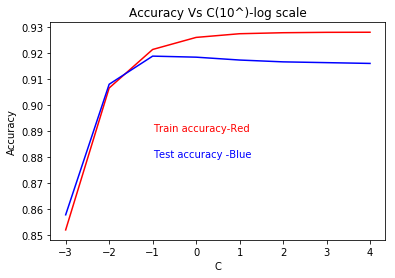

In [156]:
pred_train = np.zeros(len(C))
pred_test = np.zeros(len(C))
for i in range(len(C)):
    pred_tr, pred_tst = pred_accuracy(i)
    pred_train[i] = pred_tr
    pred_test[i] = pred_tst

plt.plot(np.log10(C), pred_train, 'r',np.log10(C), pred_test, 'b', )
plt.ylabel('Accuracy')
plt.text(-1, 0.89, r'Train accuracy-Red', color='red') 
plt.text(-1, 0.88, r'Test accuracy -Blue', color='blue')
plt.xlabel('C')
plt.title('Accuracy Vs C(10^)-log scale')
plt.show()

### Comments
From the above plot, it can be seen that as we increase C value, the training accuracy increases as the model is overfitting with increase in variance value.

In terms of bias, for low values of C, till we reach C = 0.1, the testing accuracy increases and  decreases later for values of C higher than 0.1. This shows that the model has bias problem till for values of C < 0.1.

Therefore from the above plot we select C = 0.1 as the best value as it gives the best trade off between bias and variance. 

#### The highest test accuracy is 91.88 at C = 0.1 for linear SVM with penalty 'l1' 

### Images for 10 coef_ outputs of classifier for C = 1 for penalty = 'l1'

In [103]:
# load the model from disk
loaded_models_l1 = pickle.load(open('finalized_model_l1.txt', 'rb'))

#Getting the Linear SVC model from the saved models for C = 1
lin_clf1_l1 = loaded_models_l1[3]
print(lin_clf1_l1)
print("Coefficient matrix shape: ", lin_clf1_l1.coef_.shape)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
Coefficient matrix shape:  (10, 784)


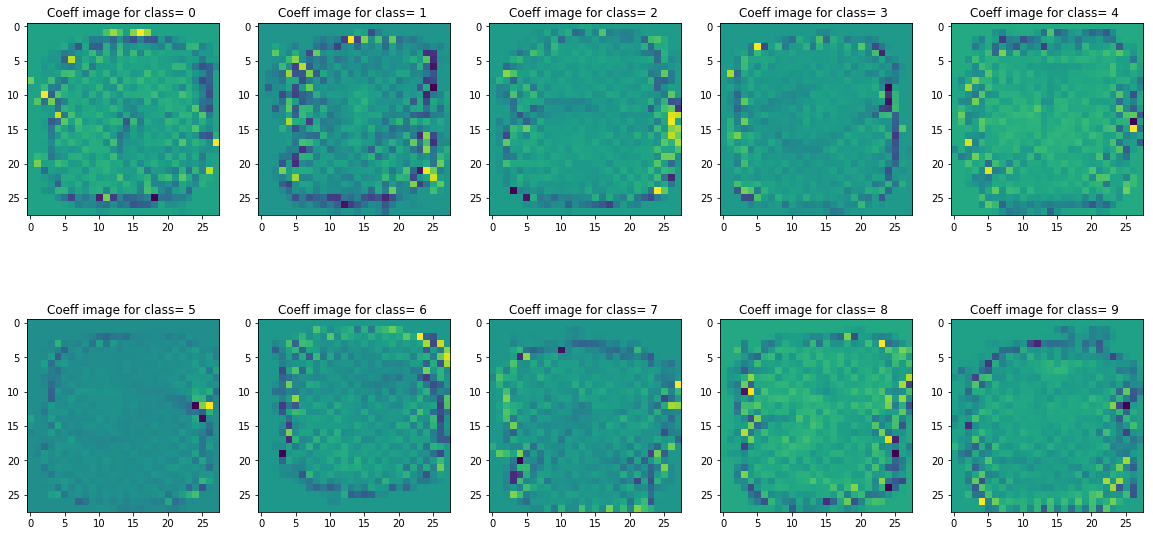

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (20,10))
for i in range(lin_clf1.coef_.shape[0]):
   
    plt.subplot(2, 5, i+1)
    W = lin_clf1.coef_[i]
    plt.title('Coeff image for class= %d ' %i)
    plt.imshow(np.reshape(W, (28,28)))
plt.show()

### Comments
The images vaguely resemble the class label. They are not that similar to ones in logistic regression

When compared with logistic regression images, the images are pixelated at the boundaries of label shape and the boundary is much more distinct for labels. For logistic regression images, the image labels were distributed and smooth.

We observe this change in images as the method of evaluating the coefficient vectors is different for SVM and logitic regression. In case of logistic regression, we optimize the loss function with probabilities and in case of SVM, we optimize the function with the distances from the hyperplane.

Also, there is not much difference in images when compared with previous images with penalty = 'l2'.

### Q2

### Using SVC with RBF kernel

### (i) Performing grid search to get parameters for best accuracy value 

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
C_range = np.outer(np.logspace(-1, 2, 4),np.array([1,5]))
# flatten matrix, change to 1D numpy array
C_range = C_range.flatten()
print("C range: ", C_range)

gamma_range = np.outer(np.logspace(-3, 0, 4),np.array([1,5]))
gamma_range = gamma_range.flatten()
print("Gamma_range: ", gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid)
indices = np.random.choice(labels_train.shape[0], 10000, replace = False)
grid.fit(images_train[indices], labels_train[indices])

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
import pickle
filename = 'finalized_model_rbf.txt'
pickle.dump(grid, open(filename, 'wb'))

[  1.00000000e-01   5.00000000e-01   1.00000000e+00   5.00000000e+00
   1.00000000e+01   5.00000000e+01   1.00000000e+02   5.00000000e+02]
[  1.00000000e-03   5.00000000e-03   1.00000000e-02   5.00000000e-02
   1.00000000e-01   5.00000000e-01   1.00000000e+00   5.00000000e+00]
The best parameters are {'C': 5.0, 'gamma': 0.050000000000000003} with a score of 0.96


### Test Accuracy table for rbf kernel

In [86]:
# load the model from disk
import pickle
grid = pickle.load(open('finalized_model_rbf.txt', 'rb'))
data = grid.cv_results_['mean_test_score'].reshape(8,8)
import pandas
C_range = ["0.1","0.5","1.0","5.0","10","50","100","500"]
Gamma_range = ["0.001","0.005","0.01","0.05","0.1","0.5","1.0","5.0"]
print("Test Accuracy for grid search")
print("C in Coloumns and gamma in rows")
pandas.DataFrame(data, C_range, Gamma_range)

Test Accuracy for grid search
C in Coloumns and gamma in rows


,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0
0.1,0.8216,0.8980,0.9137,0.8507,0.2315,0.1133,0.1133,0.1133
0.5,0.8944,0.9269,0.9410,0.9482,0.6548,0.1881,0.1133,0.1133
1.0,0.9070,0.9361,0.9496,0.9592,0.8477,0.1858,0.1133,0.1133
5.0,0.9240,0.9506,0.9599,0.9604,0.8563,0.1944,0.1133,0.1133
10,0.9305,0.9531,0.9598,0.9604,0.8563,0.1944,0.1133,0.1133
50,0.9343,0.9525,0.9598,0.9604,0.8563,0.1944,0.1133,0.1133
100,0.9330,0.9525,0.9598,0.9604,0.8563,0.1944,0.1133,0.1133
500,0.9329,0.9525,0.9598,0.9604,0.8563,0.1944,0.1133,0.1133


### Train Accuracy table for rbf kernel

In [87]:
# load the model from disk
import pickle
grid = pickle.load(open('finalized_model_rbf.txt', 'rb'))
data = grid.cv_results_['mean_train_score'].reshape(8,8)
import pandas
C_range = ["0.1","0.5","1.0","5.0","10","50","100","500"]
Gamma_range = ["0.001","0.005","0.01","0.05","0.1","0.5","1.0","5.0"]
print("Train Accuracy for grid search")
print("C in Coloumns and gamma in rows")
pandas.DataFrame(data, C_range, Gamma_range)

Train Accuracy for grid search
C in Coloumns and gamma in rows


H:\deepak\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0
0.1,0.82570,0.903199,0.923549,0.89205,0.246199,0.11330,0.1133,0.1133
0.5,0.90070,0.942400,0.964050,0.99470,0.991400,0.22375,0.1133,0.1133
1.0,0.91615,0.957800,0.980150,0.99950,1.000000,1.00000,1.0000,1.0000
5.0,0.94485,0.989900,0.999100,1.00000,1.000000,1.00000,1.0000,1.0000
10,0.95880,0.997900,0.999850,1.00000,1.000000,1.00000,1.0000,1.0000
50,0.98880,1.000000,1.000000,1.00000,1.000000,1.00000,1.0000,1.0000
100,0.99630,1.000000,1.000000,1.00000,1.000000,1.00000,1.0000,1.0000
500,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.0000,1.0000


### Training and testing with the best parameters to get the final accuracy on test images set

In [62]:
from sklearn.svm import SVC
clf = SVC(C = 5, gamma = 0.05)
indices = np.random.choice(labels_train.shape[0], 10000, replace = False)
clf.fit(images_train[indices], labels_train[indices]) 

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [122]:
print("Test accuracy for C= 5, gamma =0.05:",clf.score(images_test, labels_test))

Test accuracy for C= 5, gamma =0.05: 0.967


### Comments
#### We get best accuracy of 96.7 for C = 0.5 and gamma value = 0.05.

We can see the bias, variance changes from the above test accuracy and train accuracy tables. 
For C = 5 case, if we check the gamma values in above train accuarcy table, the accuracy value increases to 1 as we increase gamma values which shows variance is increasing and overfitting. From test accuracy table, for C = 5, the value increases till gamma = 0.05 and decreases thereafter which shows the bias is decreasing till this value but later overfitting is occuring. Hence we take the best value of gamma = 0.05 as trade off point.

In case of linear SVC, we get best accuracy of 91.83 with C=1 for penalty = l2 and 91.88 with C=0.1 for penalty = l1. For SVC rbf kernel, we get best accuracy of 96.7 on test images for C= 5, gamma = 0.05 indicating this C greater than previous C. Therfore, we choose SVC with rbf kernel when compared with linear SVC.

### (ii) Support vectors properties

In [67]:
print("Number of support vectors for each class:",clf.n_support_)
print("Support vector shape: ",clf.support_vectors_.shape)
print("Dual Coef shape: ",clf.dual_coef_.shape)
#print(np.where(clf.dual_coef_[0] < 0))

Number of support vectors for each class: [585 230 805 703 704 758 591 526 780 658]
Support vector shape:  (6340, 784)
Dual Coef shape:  (9, 6340)


### Displaying the images of support vectors

index = 0
support_vectors = np.zeros((10,784))
for  i in range(10):
    index = index + clf.n_support_[i]-2
    support_vectors[i] = clf.support_vectors_[index]

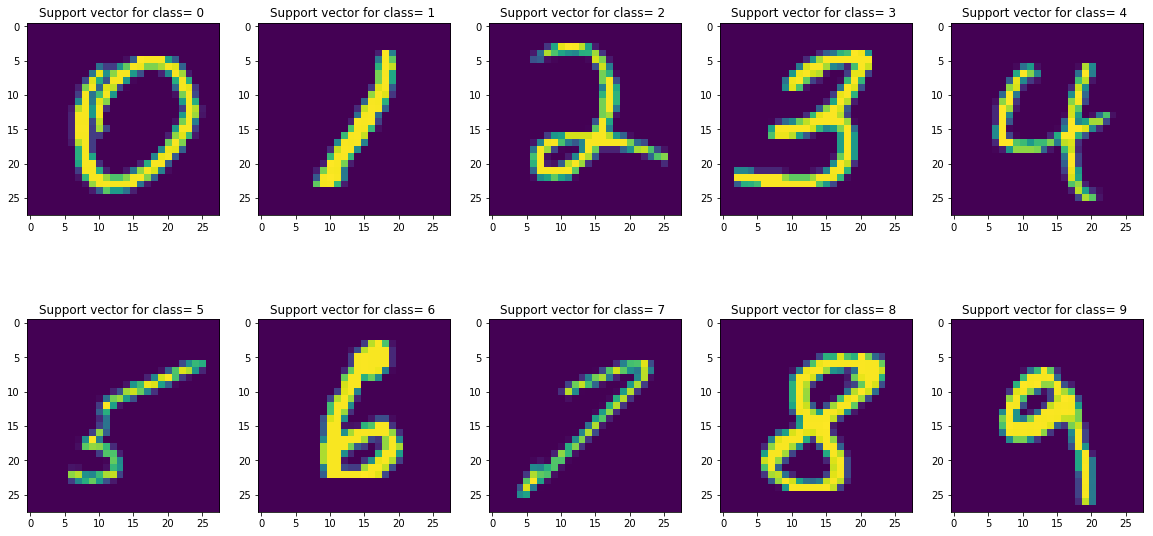

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (20,10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    W = support_vectors[i]
    plt.title('Support vector for class= %d ' %i)
    plt.imshow(np.reshape(W, (28,28)))
plt.show()

### Comments
Sample support vectors images are shown for each class above.

Support vectors are basically the image vectors of that class which lie on the margin classifier as we can see from the images.

Also from the support vectors properties printed above, we can see the number of support vectors for each class and total support vector matrix shape. From dual_coef attribute, we get (y*alpha) values which shows positive alpha values for that particular class and negative alpha values for the rest of the classes. The dual_coef matrix is [(n_class-1) by n_SV] shape indicating each class is compared with rest of classes support vectors and positive values are assigned for that class alpha values and negative sign for rest of the classes keeping the magnitude same for all (n_class-1) rows.

### (iii) Using SVC with poly kernel 

### (i) Performing grid search to get parameters for best accuracy value 

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
C_range = np.outer(np.logspace(1, 4, 4),np.array([1,5]))
# flatten matrix, change to 1D numpy array
C_range = C_range.flatten()
print("C range: ", C_range)

degree_range = np.arange(1,9)
print("Degree of polynomial: ", degree_range)
param_grid = dict(degree=degree_range, C=C_range)
grid = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid)
indices = np.random.choice(labels_train.shape[0], 10000, replace = False)
grid.fit(images_train[indices], labels_train[indices])
print("The best parameters are %s with a score of %0.3f"
      % (grid.best_params_, grid.best_score_))
import pickle
filename = 'finalized_model_poly1.txt'
pickle.dump(grid, open(filename, 'wb'))

C range:  [  1.00000000e+01   5.00000000e+01   1.00000000e+02   5.00000000e+02
   1.00000000e+03   5.00000000e+03   1.00000000e+04   5.00000000e+04]
Degree of polynomial:  [1 2 3 4 5 6 7 8]
The best parameters are {'C': 500.0, 'degree': 2} with a score of 0.953


In [111]:
# load the model from disk
import pickle
grid = pickle.load(open('finalized_model_poly1.txt', 'rb'))
data = grid.cv_results_['mean_test_score'].reshape(8,8)
import pandas
C_range = ["1","5","10","50","100","500","1000","5000"]
degree_range = ["1","2","3","4","5","6","7","8"]

print("The best parameters are %s with a score of %0.3f"
      % (grid.best_params_, grid.best_score_))
print("Test Accuracy for grid search")
print("C in Coloumns and degree in rows")
pandas.DataFrame(data, C_range, degree_range)

The best parameters are {'C': 500.0, 'degree': 2} with a score of 0.953
Test Accuracy for grid search
C in Coloumns and degree in rows


,1,2,3,4,5,6,7,8
1,0.9216,0.9072,0.5664,0.1366,0.1138,0.1138,0.1138,0.1138
5,0.9239,0.9418,0.8242,0.3105,0.1256,0.1138,0.1138,0.1138
10,0.9216,0.9475,0.8748,0.4630,0.1465,0.1145,0.1138,0.1138
50,0.9075,0.9532,0.9294,0.7343,0.2872,0.1311,0.1142,0.1138
100,0.9048,0.9526,0.9405,0.8032,0.4003,0.1541,0.1173,0.1138
500,0.9042,0.9520,0.9454,0.8915,0.6419,0.2731,0.1396,0.1161
1000,0.9042,0.9520,0.9455,0.9111,0.7204,0.3612,0.1624,0.1190
5000,0.9042,0.9520,0.9442,0.9278,0.8396,0.5693,0.2669,0.1459


In [120]:
# load the model from disk
import pickle
grid = pickle.load(open('finalized_model_poly1.txt', 'rb'))
data = grid.cv_results_['mean_train_score'].reshape(8,8)
import pandas
C_range = ["1","5","10","50","100","500","1000","5000"]
degree_range = ["1","2","3","4","5","6","7","8"]

#print("The best parameters are %s with a score of %0.3f"
#      % (grid.best_params_, grid.best_score_))
print("Train Accuracy for grid search")
print("C in Coloumns and degree in rows")
pandas.DataFrame(data, C_range, degree_range)

Train Accuracy for grid search
C in Coloumns and degree in rows


H:\deepak\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,1,2,3,4,5,6,7,8
1,0.942552,0.920550,0.574201,0.137800,0.113800,0.11380,0.113800,0.113800
5,0.967900,0.965501,0.839950,0.318000,0.125800,0.11380,0.113800,0.113800
10,0.980500,0.979200,0.892250,0.473051,0.148100,0.11440,0.113800,0.113800
50,0.996100,0.998300,0.966000,0.755248,0.295150,0.13305,0.114350,0.113800
100,0.999200,0.999700,0.984001,0.832949,0.412501,0.15655,0.117450,0.113800
500,1.000000,1.000000,0.998300,0.941649,0.671348,0.28560,0.142250,0.116600
1000,1.000000,1.000000,0.999400,0.967550,0.758999,0.38005,0.167351,0.119750
5000,1.000000,1.000000,1.000000,0.992950,0.900300,0.60480,0.284100,0.151249


In [73]:
clf_poly = SVC(kernel = 'poly', C = 1000, degree = 2)
indices = np.random.choice(labels_train.shape[0], 10000, replace = False)
clf_poly.fit(images_train[indices], labels_train[indices])

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
print("Test accuracy for C= 500, degree =2:",clf_poly.score(images_test, labels_test))

Test accuracy for C= 500, degree =2: 0.9637


### Comments
#### We get best accuracy of 96.37 for C = 500 and degree = 2.

We can see the bias, variance changes from the above test accuracy and train accuracy tables. 
For C = 500 case, if we check the degree values in above train accuarcy table, the accuracy value increases to 1 as we increase degree values to 2  and decreases thereafter. From test accuracy table, for C = 500, the value increases till degree = 2 and decreases thereafter which shows the bias is decreasing till this value but later overfitting is occuring. Hence we take the best value of degree = 2 as trade off point.

In case of linear SVC, we get best accuracy of 91.83 with C=1 for penalty = l2 and 91.88 with C=0.1 for penalty = l1. For SVC poly kernel, we get best accuracy of 96.37 on test images for C= 500, degree = 2 indicating this C greater than previous C. Therfore, we choose SVC with poly kernel when compared with linear SVC.

### (ii) Support vectors properties

In [77]:
print("Number of support vectors for each class:",clf_poly.n_support_)
print("Support vector shape: ",clf_poly.support_vectors_.shape)
print("Dual Coef shape: ",clf_poly.dual_coef_.shape)

Number of support vectors for each class: [149 142 306 327 285 368 208 275 350 347]
Support vector shape:  (2757, 784)
Dual Coef shape:  (9, 2757)


### Displaying the images of support vectors

In [84]:
index = 0
support_vectors_poly = np.zeros((10,784))
for  i in range(10):
    index = index + clf_poly.n_support_[i]-2
    support_vectors_poly[i] = clf_poly.support_vectors_[index]

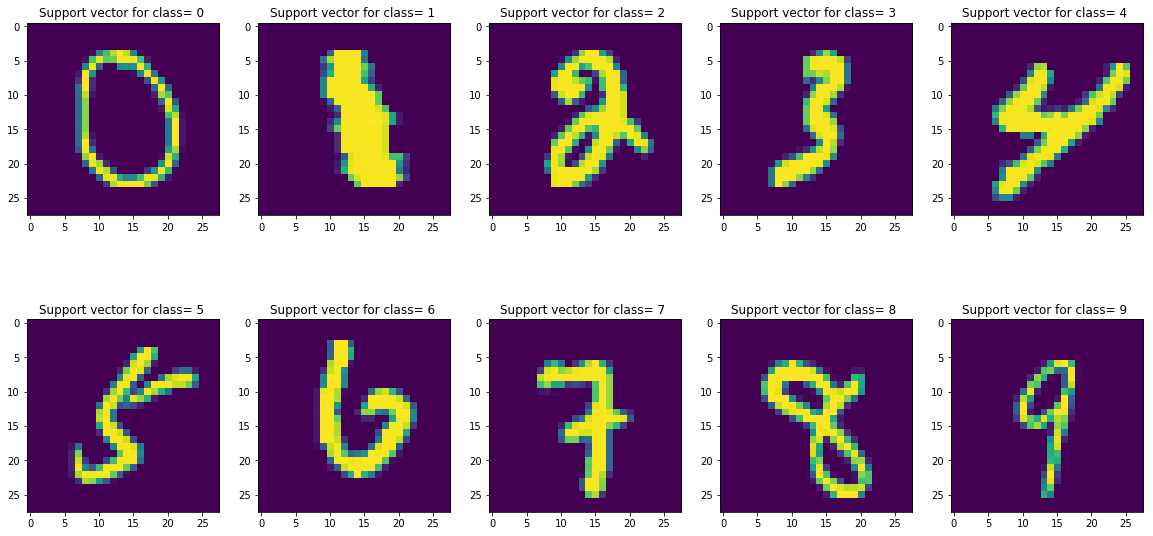

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (20,10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    W = support_vectors_poly[i]
    plt.title('Support vector for class= %d ' %i)
    plt.imshow(np.reshape(W, (28,28)))
plt.show()

### Comments
Sample support vectors images for SVC-poly kernel are shown for each class above.

Support vectors are basically the image vectors of that class which lie on the margin classifier as we can see from the images.

Also from the support vectors properties printed above, we can see the number of support vectors for each class and total support vector matrix shape. From dual_coef attribute, we get (y*alpha) values which shows positive alpha values for that particular class and negative alpha values for the rest of the classes.

Here we get less number of support vectors when compared with rbf kernel as rbf is local function and effects the changes only locally which reults is choosing more number os support vectors, while poly is a global function and results is wider changes.